In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [104]:
df = pd.read_csv('/content/personality_dataset.csv')

In [105]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [106]:
df.tail()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert
2899,3.0,No,6.0,6.0,No,6.0,9.0,Extrovert


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [108]:
df.shape

(2900, 8)

In [109]:
df.isnull().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [110]:
numeric_col = df.select_dtypes(include=np.number).columns
categorical_col = df.select_dtypes(include ='object').columns
numeric_col
categorical_col

Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')

In [111]:
from sklearn.impute import SimpleImputer

In [112]:
for col in numeric_col:
    imputer = SimpleImputer(strategy='mean')
    df[col] = imputer.fit_transform(df[[col]])

In [113]:
df.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,73
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,52
Friends_circle_size,0
Post_frequency,0
Personality,0


In [114]:
for col in categorical_col:
    df[col] = df[col].fillna('Unknown')

In [115]:
df.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [116]:
df.duplicated().sum()

np.int64(392)

In [117]:
df.drop_duplicates(inplace=True)

In [118]:
df.duplicated().sum()

np.int64(0)

In [119]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

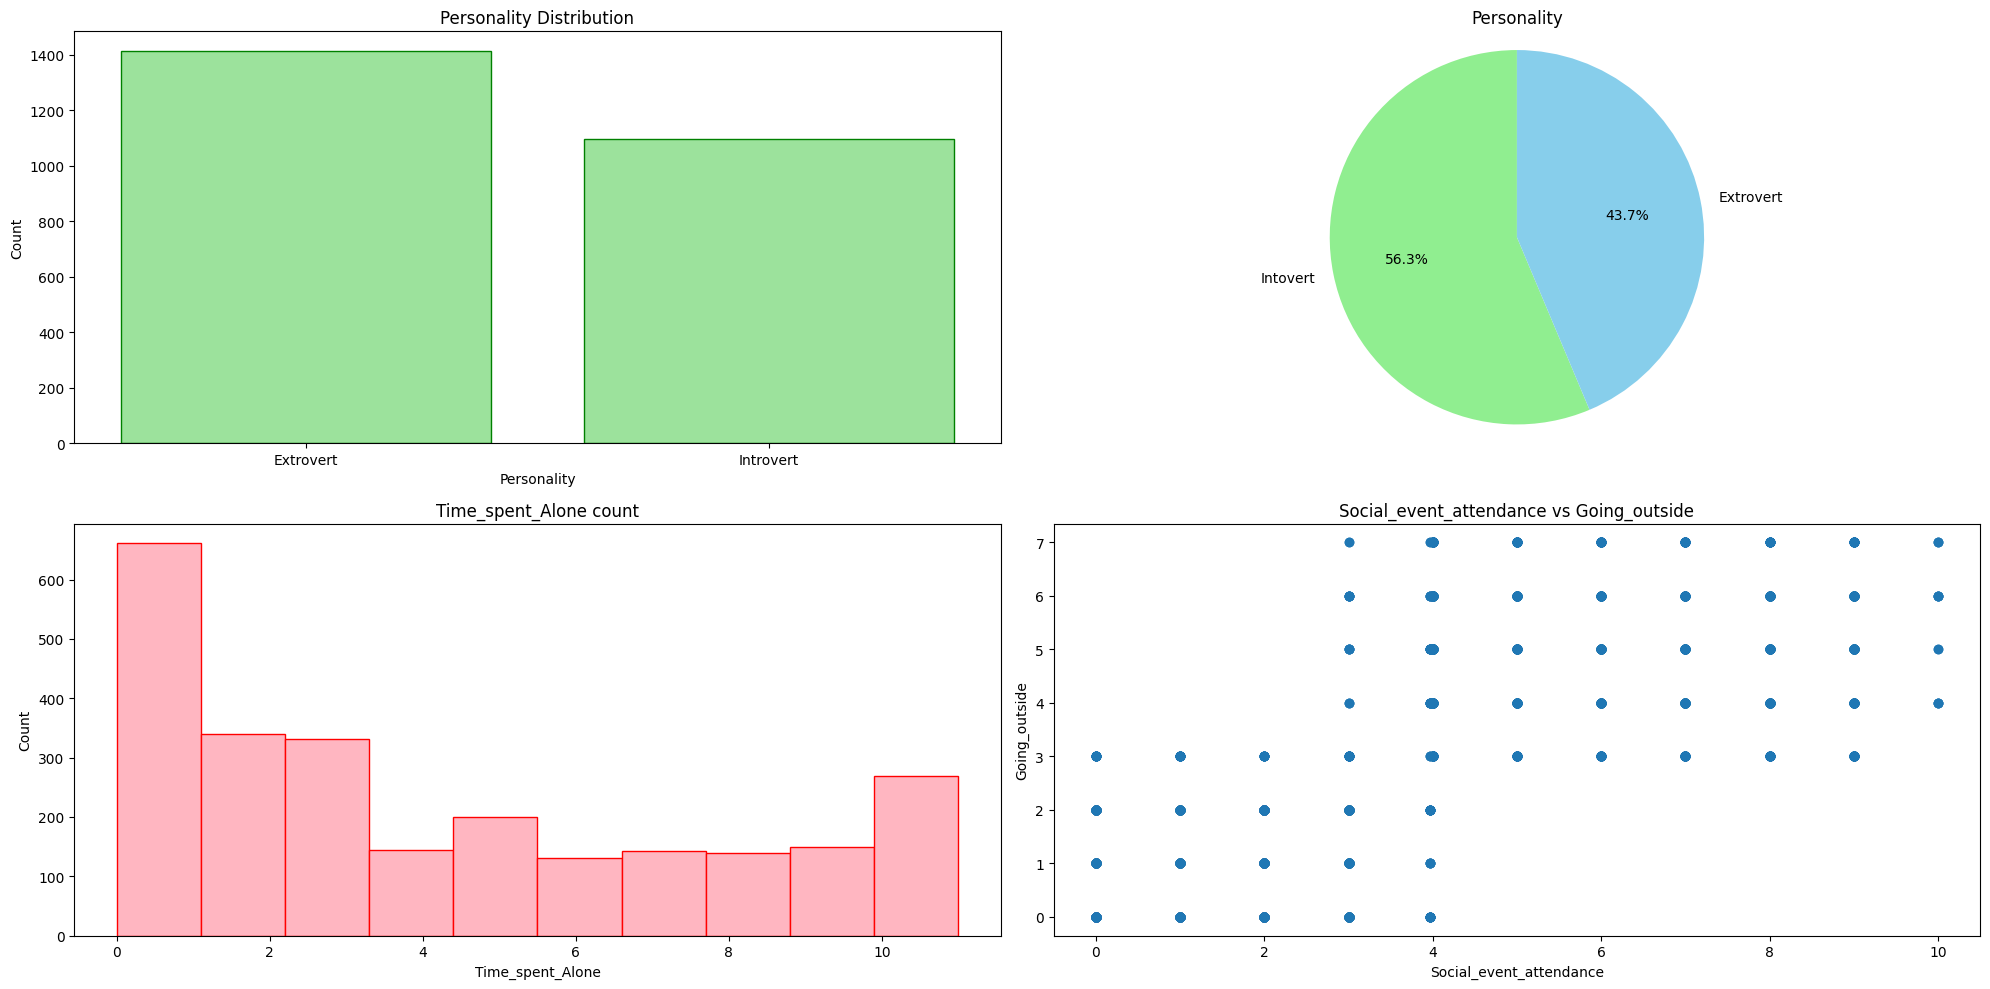

In [120]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Personality', data=df, color='lightgreen', edgecolor = 'green')
plt.title('Personality Distribution')
plt.xlabel('Personality')
plt.ylabel('Count')



plt.subplot(2, 2, 3)
plt.hist(df['Time_spent_Alone'], color = 'lightpink', edgecolor = 'red')
plt.ylabel('Count')
plt.xlabel('Time_spent_Alone')
plt.title('Time_spent_Alone count')



plt.subplot(2, 2, 2)
plt.pie(df['Personality'].value_counts(), labels=['Intovert', 'Extrovert'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'skyblue'])
plt.axis('equal')
plt.title('Personality')

plt.subplot(2, 2, 4)
plt.scatter(x='Social_event_attendance', y='Going_outside', colorizer='Personality', data=df)
plt.xlabel('Social_event_attendance')
plt.ylabel('Going_outside')
plt.title('Social_event_attendance vs Going_outside')

plt.tight_layout()
plt.show()






## 🧠 Personality & Social Behavior Insights

---

### 📊 Top Left: **Personality Distribution (Bar Chart)**

This bar chart compares the number of **Extroverts** and **Introverts** in the dataset.

- **Extroverts** slightly outnumber **Introverts**.
- Suggests a fairly balanced but slightly more outgoing sample group.

---

### 🥧 Top Right: **Personality Distribution (Pie Chart)**

This pie chart shows the same data as above, in percentages:

- **Introverts**: 56.4%
- **Extroverts**: 43.6%

This implies that over **half** of the participants identify as **Introverts**, even though extroverts had a slightly higher count in the bar chart. This discrepancy may be due to how data was grouped.

---

### 📉 Bottom Left: **Time Spent Alone (Histogram)**

This histogram displays how often people spend time alone on a scale (likely from 0 to 10+ hours):

- The **majority spend very little time alone** (peaks around 0–1).
- A **secondary bump** appears around 10–11 hours, showing a small group that prefers extended alone time.
- Indicates a skew toward **social behavior** with a subset of more solitary individuals.

---

### 🔄 Bottom Right: **Social Event Attendance vs Going Outside (Scatter Plot)**

This scatter plot compares how often individuals:

- **Attend social events** (X-axis)
- **Go outside** (Y-axis)

Key points:
- A strong **diagonal cluster** suggests a positive correlation: the more social events someone attends, the more often they go outside.
- Very few people attend many events but stay inside, or vice versa.

---

### 🧩 Summary:

- Most people are **moderately social**, with more **introverts** than extroverts.
- There’s a **clear link between attending social events and going outside**.
- While many spend little time alone, a notable minority prefer solitude.
''')


              count      mean       std  min  25%  50%  75%   max
Personality                                                      
Extrovert    1413.0  5.603731  2.348210  0.0  4.0  6.0  7.0  10.0
Introvert    1095.0  1.525577  1.718126  0.0  0.0  1.0  2.0   9.0


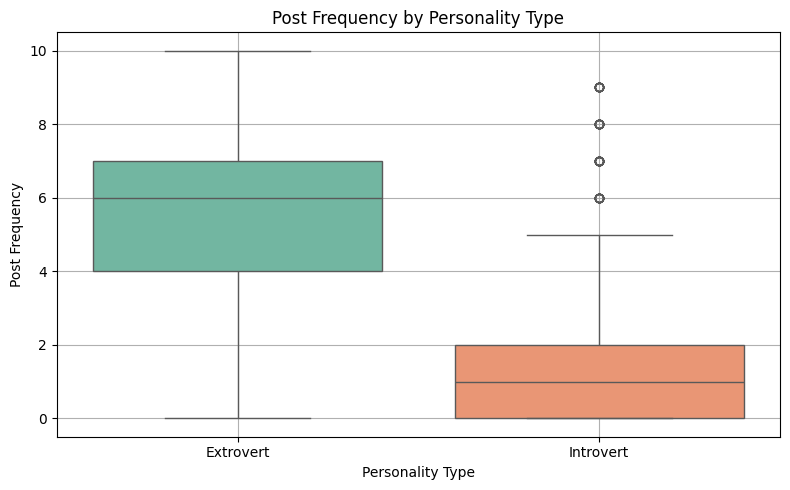

In [121]:
post_freq_summary = df.groupby("Personality")["Post_frequency"].describe()
print(post_freq_summary)
plt.figure(figsize=(8, 5))
sns.boxplot(x="Personality", y="Post_frequency", data=df, palette="Set2")
plt.title("Post Frequency by Personality Type")
plt.ylabel("Post Frequency")
plt.xlabel("Personality Type")
plt.grid(True)
plt.tight_layout()
plt.show()

Extroverts tend to post much more frequently on social media than Introverts.

The distribution for Extroverts is centered around 6, while for Introverts, it is around 1.

There's a wider and higher spread among Extroverts.

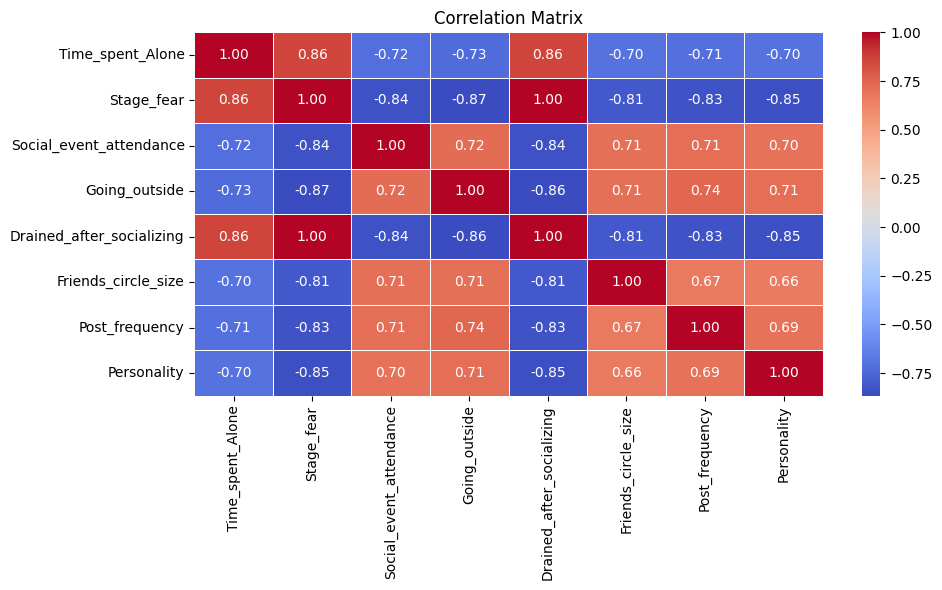

,Post_frequency,Personality
Post_frequency,1.000000,0.694445
Going_outside,0.739703,0.714011
Social_event_attendance,0.709631,0.698020
Personality,0.694445,1.000000
Friends_circle_size,0.670566,0.661848
Time_spent_Alone,-0.709539,-0.699533
Drained_after_socializing,-0.829577,-0.848921
Stage_fear,-0.832305,-0.847911


In [122]:
binary_mappings = {
    "Stage_fear": {"Yes": 1, "No": 0},
    "Drained_after_socializing": {"Yes": 1, "No": 0},
    "Personality": {"Introvert": 0, "Extrovert": 1}
}

df["Stage_fear"] = df["Stage_fear"].map(binary_mappings["Stage_fear"])
df["Drained_after_socializing"] = df["Drained_after_socializing"].map(binary_mappings["Drained_after_socializing"])
df["Personality"] = df["Personality"].map(binary_mappings["Personality"])


correlation_matrix = df.corr(numeric_only=True)


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


correlations_with_target = correlation_matrix[["Post_frequency", "Personality"]].sort_values(by="Post_frequency", ascending=False)
correlations_with_target

** More social behaviors like:**

Going outside

Attending events

Having a large friend circle

➝ Strongly increase post frequency and are highly associated with extroverts.

**Introverted traits such as:**

Being drained after socializing

Having stage fear

Spending time alone

➝ Strongly decrease post frequency and align with introversion.

In [123]:
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

converting labels into numeric form (ex; 0 1)

In [124]:

le = LabelEncoder()
df['Personality'] = le.fit_transform(df['Personality'])
df['Drained_after_socializing'] =le.fit_transform(df['Drained_after_socializing'])
df['Stage_fear'] = le.fit_transform(df['Stage_fear'])

print(df.head())

   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0           0                      4.0            6.0   
1               9.0           1                      0.0            0.0   
2               9.0           1                      1.0            2.0   
3               0.0           0                      6.0            7.0   
4               3.0           0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                          0                 13.0             5.0            1  
1                          1                  0.0             3.0            0  
2                          1                  5.0             2.0            0  
3                          0                 14.0             8.0            1  
4                          0                  8.0             5.0            1  


In [125]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [126]:
X = df[['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency']]
y = df['Personality']

splitting data into training and testing dataset as

x_train

y_train

x_test

y_test

In [127]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
grid_search = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

model class creation and taining model

In [128]:
model = DecisionTreeClassifier()
model = grid_search.best_estimator_
y_pred = model.predict(X_test)

accuracy check

In [129]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 92.96%


visualization of desicion tree

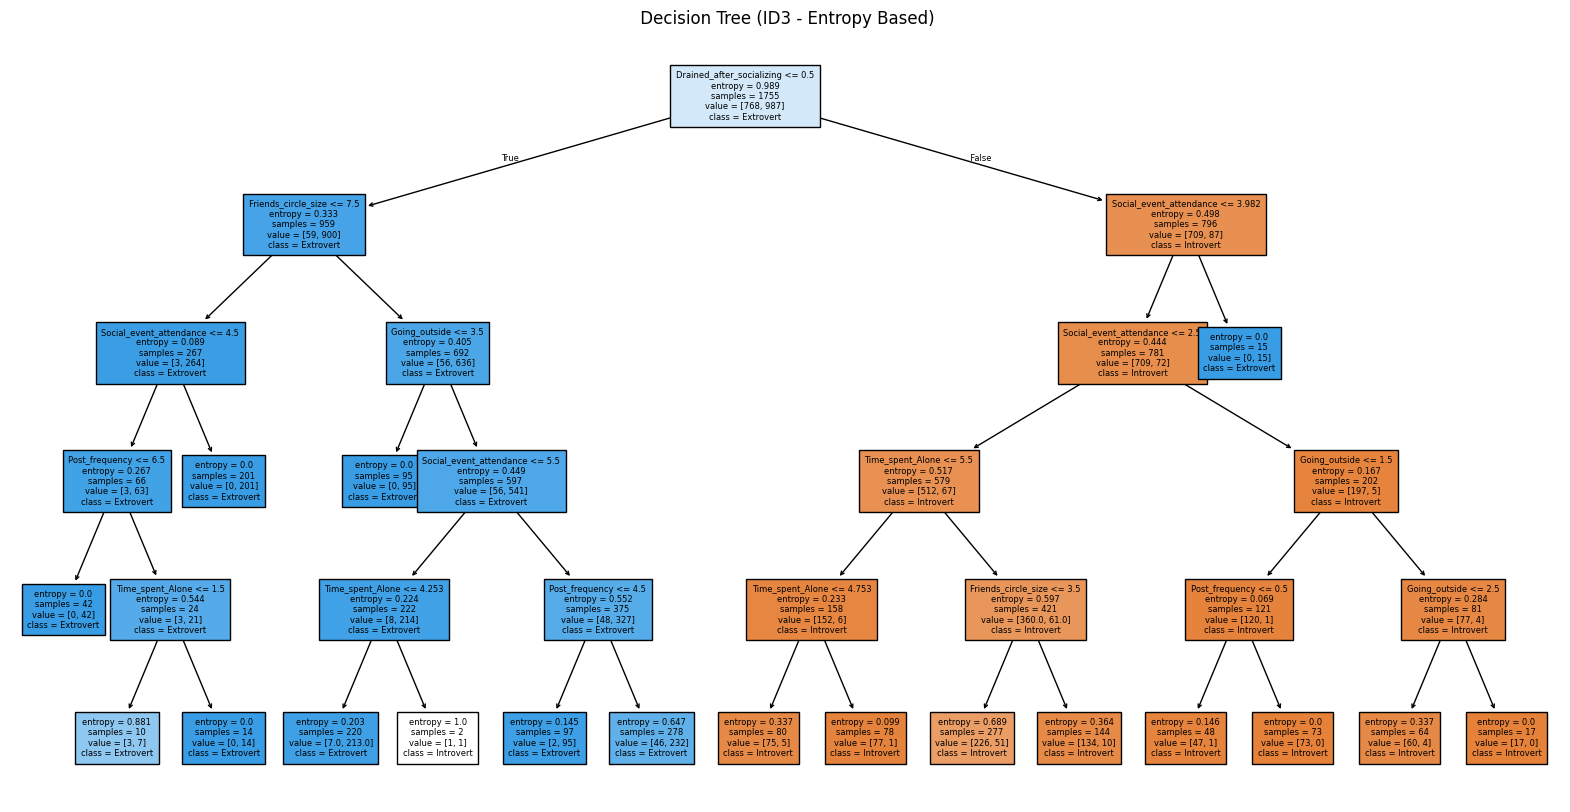

In [130]:
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Introvert', 'Extrovert'],fontsize = 6)
plt.title(" Decision Tree (ID3 - Entropy Based)")
plt.show()


sample input for predicting personality

In [131]:
print('NOTE :\nGIVE THE FOLLOWING INFORMATION ')
print(' \nNumber of hours an you typically spends alone daily (0 - 9)')
TM = int(input('Time_spent_Alone : '))
print('\nWhether the you experiences stage fear([no]0 and [yes]1)')
SF = int(input('Stage_fear : '))
print(' \nFrequency (scale 0-10) of attending social events.')
SEA = int(input('Social_event_attendance : '))
print(' \nHow often the you  goes outside (scale 0-10).')
GO = int(input('Going_outside : '))
print(' \nWhether the you  feels drained after socializing ([no]0 and [yes]1)')
DSA = int(input('Drained_after_socializing : '))
print(' \nNumber of close friends')
FCS = int(input('Friends_circle_size : '))
print(' \ngive Frequency of posting on social media in range (0 - 9)')
PS = int(input('Post_frequency : '))




sample_input = np.array([[TM,SF, SEA, GO, DSA, FCS, PS]])
sample_prediction =model.predict(sample_input)
print(" \n\n Personality Prediction for sample input:", "Extrovert" if sample_prediction[0] == 1 else "Introvert")

NOTE :
GIVE THE FOLLOWING INFORMATION 
 
Number of hours an you typically spends alone daily (0 - 9)
Time_spent_Alone : 5

Whether the you experiences stage fear([no]0 and [yes]1)
Stage_fear : 1
 
Frequency (scale 0-10) of attending social events.
Social_event_attendance : 3
 
How often the you  goes outside (scale 0-10).
Going_outside : 0
 
Whether the you  feels drained after socializing ([no]0 and [yes]1)
Drained_after_socializing : 1
 
Number of close friends
Friends_circle_size : 2
 
give Frequency of posting on social media in range (0 - 9)
Post_frequency : 2
 

 Personality Prediction for sample input: Introvert
